Index(['unnamed:_0', 'job_title', 'company_name', 'industry', 'location',
       'employment_type', 'salary_range', 'job_description', 'required_skills',
       'key_skills', 'preffered_skills', 'experience_level',
       'experience_required', 'language', 'education', 'application_link',
       'posting_date', 'deadline', 'language_of_posting'],
      dtype='object')
[('data', 150), ('business', 67), ('support', 46), ('analysis', 33), ('stakeholders', 33), ('develop', 29), ('processes', 29), ('reporting', 28), ('insights', 27), ('development', 26), ('solutions', 26), ('new', 23), ('powerbi', 22), ('reports', 22), ('requirements', 22), ('work', 21), ('performance', 20), ('technical', 20), ('ensure', 19), ('maintain', 19)]
[('data analysis', 14), ('best practices', 8), ('data models', 8), ('master data', 8), ('understand data', 8), ('business requirements', 7), ('ensure data', 7), ('business stakeholders', 6), ('data insights', 6), ('data quality', 6)]


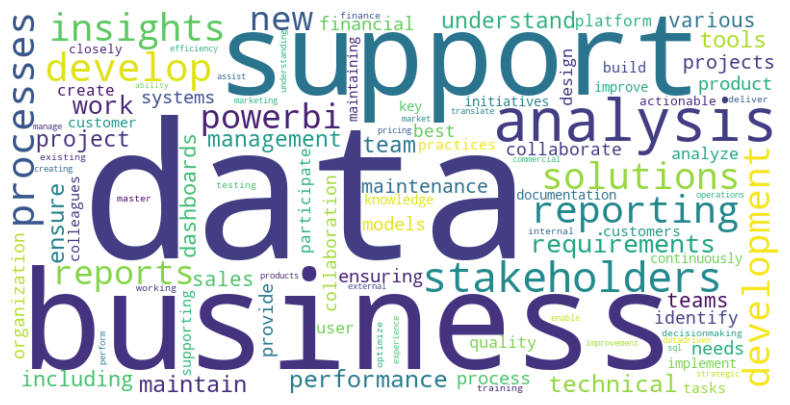

In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Path to your CSV file
file_path = 'data_cleaning_script/cleaned_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check column names in the DataFrame
print(df.columns)

# Get the "Job Description" column and replace NaN with empty strings
df['job_description'] = df['job_description'].fillna('')

# Convert to a list
job_descriptions = df['job_description'].tolist()

# Convert to DataFrame
df = pd.DataFrame(job_descriptions, columns=['description'])

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean the text
df['cleaned'] = df['description'].apply(preprocess_text)

# Convert ENGLISH_STOP_WORDS to a list for compatibility
stop_words = list(ENGLISH_STOP_WORDS)

# Tokenization and transformation to vectors with stopwords removal
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned'])
word_freq = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# Print the most frequent words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_freq[:20])

# Bigram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned'])
bigram_freq = X.sum(axis=0).A1
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_freq))
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_bigram_freq[:10])

# Visualization - Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Index(['unnamed:_0', 'job_title', 'company_name', 'industry', 'location',
       'employment_type', 'salary_range', 'job_description', 'required_skills',
       'key_skills', 'preffered_skills', 'experience_level',
       'experience_required', 'language', 'education', 'application_link',
       'posting_date', 'deadline', 'language_of_posting'],
      dtype='object')
Most frequent words in job descriptions:
[('data', 150), ('business', 67), ('support', 46), ('analysis', 33), ('stakeholders', 33), ('develop', 29), ('processes', 29), ('reporting', 28), ('insights', 27), ('development', 26), ('solutions', 26), ('new', 23), ('powerbi', 22), ('reports', 22), ('requirements', 22), ('work', 21), ('performance', 20), ('technical', 20), ('ensure', 19), ('maintain', 19)]
Most frequent key skills:
[('data', 32), ('sql', 26), ('experience', 23), ('powerbi', 19), ('excel', 13), ('skills', 12), ('power', 10), ('python', 10), ('english', 9), ('knowledge', 9), ('tableau', 9), ('work', 9), ('managemen

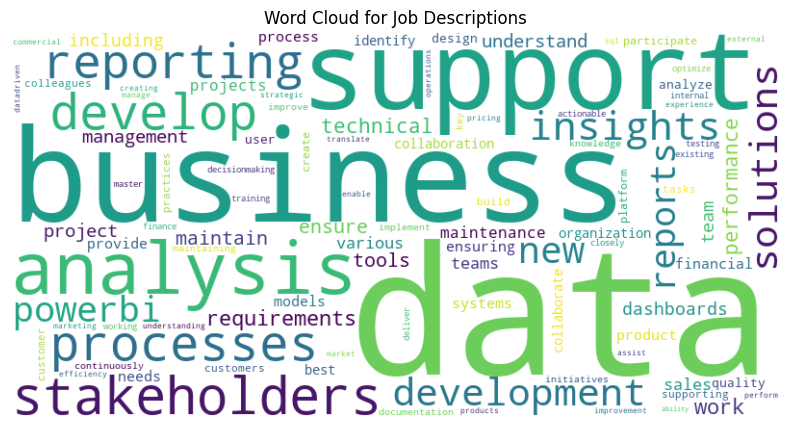

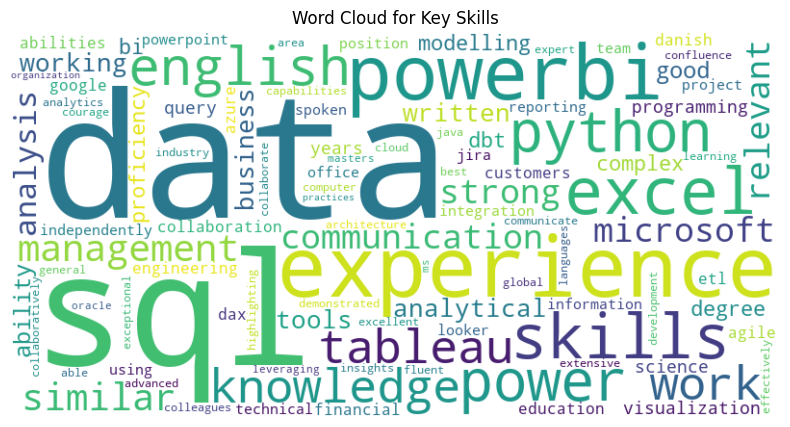

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Path to your CSV file
file_path = 'data_cleaning_script/cleaned_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check column names in the DataFrame
print(df.columns)

# Get the "Job Description" and "key_skills" columns and replace NaN with empty strings
df['job_description'] = df['job_description'].fillna('')
df['key_skills'] = df['key_skills'].fillna('')

# Convert to a list for job descriptions and key skills
job_descriptions = df['job_description'].tolist()
key_skills = df['key_skills'].tolist()

# Convert job descriptions and key skills to DataFrame
df = pd.DataFrame({'description': job_descriptions, 'key_skills': key_skills})

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean the text for both description and key skills
df['cleaned_description'] = df['description'].apply(preprocess_text)
df['cleaned_key_skills'] = df['key_skills'].apply(preprocess_text)

# Convert ENGLISH_STOP_WORDS to a list for compatibility
stop_words = list(ENGLISH_STOP_WORDS)

# Tokenization and transformation to vectors with stopwords removal for job descriptions
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned_description'])
word_freq = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# Print the most frequent words for job descriptions
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print("Most frequent words in job descriptions:")
print(sorted_word_freq[:20])

# Tokenization and transformation to vectors with stopwords removal for key skills
vectorizer_skills = CountVectorizer(stop_words=stop_words)
X_skills = vectorizer_skills.fit_transform(df['cleaned_key_skills'])
skills_freq = X_skills.sum(axis=0).A1
skills_freq = dict(zip(vectorizer_skills.get_feature_names_out(), skills_freq))

# Print the most frequent key skills
sorted_skills_freq = sorted(skills_freq.items(), key=lambda x: x[1], reverse=True)
print("Most frequent key skills:")
print(sorted_skills_freq[:20])

# Bigram analysis for job descriptions
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X_bigram = vectorizer_bigram.fit_transform(df['cleaned_description'])
bigram_freq = X_bigram.sum(axis=0).A1
bigram_freq = dict(zip(vectorizer_bigram.get_feature_names_out(), bigram_freq))
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
print("Most frequent bigrams in job descriptions:")
print(sorted_bigram_freq[:10])

# Visualization - Word Cloud for Job Descriptions
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()

# Visualization - Word Cloud for Key Skills
wordcloud_skills = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(skills_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_skills, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Key Skills')
plt.show()


In [9]:
df.head()


,description,key_skills,cleaned_description,cleaned_key_skills
0,Your duties will include:Development and maint...,"PowerBI, DAX, SQL",your duties will includedevelopment and mainte...,powerbi dax sql
1,Responsibilities: Extract and transform data f...,"PowerBI, SalesForce, Excel",responsibilities extract and transform data fr...,powerbi salesforce excel
2,Responsabilities: Data Analysis and Reporting:...,SQL Python,responsabilities data analysis and reporting p...,sql python
3,"Serve as a trusted business partner, providing...",A minimum of 2 years of relevant experience in...,serve as a trusted business partner providing ...,a minimum of years of relevant experience in a...
4,"Analyze data to identify patterns and trends, ...","Excellent analytical skills, driven by logic a...",analyze data to identify patterns and trends p...,excellent analytical skills driven by logic an...
